In [62]:
%matplotlib notebook
from modsim import *

earth = Condition(thickness = 24140,
                     radius1 = 20037137.47,
                     radius2 = 6371393,
                     density = 5510)
earth.volume1 = earth.thickness * earth.radius1** 2 * np.pi
earth.volume2 = earth.thickness * earth.radius2**2 * np.pi
earth.mass = earth.volume1 * earth.density



baseball = Condition(x = 0, 
                      y = (earth.thickness/2) + 1,
                      ay = 9.8,
                      G = 6.67e-11,
                      mass = 145e-3,
                      diameter = 73e-3,
                      rho = 1.2,
                      C_d = 0.3,
                      angle = 45,
                      velocity = 4000,
                      duration = 25.1)

def make_system(condition):
    """Make a system object.
    
    condition: Condition object with angle, velocity, x, y,
               diameter, duration, g, mass, rho, and C_d
               
    returns: System object
    """
    unpack(condition)
    
    # convert angle to degrees
    theta = np.deg2rad(angle)
    
    # compute x and y components of velocity
    vx, vy = pol2cart(theta, velocity)
    
    # make the initial state
    init = State(x=x, y=y, vx=vx, vy=vy)
    
    # compute area from diameter
    area = np.pi * (diameter/2)**2
    
    # compute timestamps
    ts = linspace(0, duration, 101)
    
    return System(init=init, G=G, mass=mass, 
                  area=area, rho=rho, C_d=C_d, ts=ts)

def slope_func(state, t, system):
    x, y, vx, vy = state
    unpack(system)
    p = Vector(x, y)
    v = Vector(vx, vy)
    f_grav = (-G * earth.mass * mass * p/ (p.mag**2))
    f_drag = -rho * v.mag * v * C_d * area / 2
    
    print(f_grav)
    print(f_grav.mag)
    
    a_grav = f_grav / mass
    a_drag = f_drag / mass
    a_y= Vector(0, -ay)
    
    a = a_grav + a_drag + a_y


    return vx, vy, a.x, a.y
    



In [64]:
system = make_system(baseball)
slope_func(system.init, 0, system)

"""
run_odeint(system, slope_func)

xs = system.results.x
ys = system.results.y

newfig()
plot(xs, label='x')
plot(ys, label='y')

decorate(xlabel='Time (s)',
         ylabel='Position (m)')
"""


[ -0.00000000e+00  -1.34419006e+08] dimensionless
134419005.85914284 dimensionless


"\nrun_odeint(system, slope_func)\n\nxs = system.results.x\nys = system.results.y\n\nnewfig()\nplot(xs, label='x')\nplot(ys, label='y')\n\ndecorate(xlabel='Time (s)',\n         ylabel='Position (m)')\n"

<IPython.core.display.Javascript object>


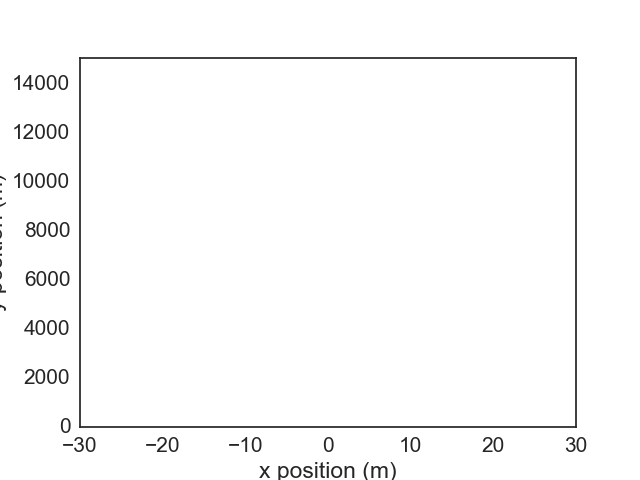

In [59]:


newfig()
decorate(xlabel='x position (m)',
         ylabel='y position (m)',
         xlim=[-30, 30],
         ylim=[-50, 15000],
         legend=False)

for x, y in zip(system.results.x, system.results.y):
    plot(x, y, 'bo', update=True)
    sleep(0.01)